<a href="https://colab.research.google.com/github/esmanurulu/Predicting-Road-Accident-Risk-using-Deep-Regression-on-Synthetic-Data/blob/main/Predicting%20Road%20Accident%20Risk%20using%20Deep%20Regression%20on%20Synthetic%20Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# YAP470 - ANALYTICS PROJECT: Accident Risk Prediction (Regression)**

This Colab notebook contains the Thorough Exploratory Data Analysis (EDA) for our "Predicting Road Accident Risk" project.

***1. Project and Dataset Definition (Context)***

The primary goal of our project is to solve a Regression task: to predict the accident_risk, a continuous value (between 0 and 1), based on various road and environmental conditions using a synthetic dataset from the Kaggle Playground Series.

**Dataset:** Kaggle Playground Series S5E10 (Synthetic Tabular Data)

**Problem Type:** Regression

**Target Variable:** accident_risk (float64)

**Evaluation Metric:** RMSE (Root Mean Squared Error)

***2. Features (Content)***

The primary features we will use to train our model are:

**road_type:** Type of road (e.g., highway, urban, rural)

**num_lanes:** Number of lanes

**curvature:** Curvature/Grade

**speed_limit:** Speed limit

**lighting:** Lighting conditions (e.g., daylight, dim, dark)

**weather:** Weather conditions (e.g., clear, rainy, foggy)

**road_signs_present:** Presence of road signs (True/False)

**public_road:** Public road (True/False)

**time_of_day:** Time of day (e.g., morning, afternoon, evening)

**holiday:** Holiday (True/False)

**school_season:** School season (True/False)

**num_reported_accidents:** (Related) Number of reported accidents

In [ ]:
!pip install kaggle
print("Kaggle kütüphanesi yüklendi.")

Kaggle kütüphanesi yüklendi.


In [ ]:
from google.colab import files
#for my kaggle id
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esmanurulu","key":"55770ac72bb7ad8864daf4954fd2f850"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API ayarlandı.")

Kaggle API ayarlandı.


In [ ]:
# playground-series-s5e10, verilerini kullanacağımız yarışma
!kaggle competitions download -c playground-series-s5e10
print("Dataset indirildi.")

  0% 0.00/7.76M [00:00<?, ?B/s]
100% 7.76M/7.76M [00:00<00:00, 395MB/s]
Dataset indirildi.


In [ ]:
!unzip playground-series-s5e10.zip
print("'train.csv', 'test.csv','sample_submission.csv' ")

Archive:  playground-series-s5e10.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
'train.csv', 'test.csv','sample_submission.csv' 


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

try:
    df = pd.read_csv('train.csv')
    print(f"Boyut: {df.shape}")

    display(df.head())

except FileNotFoundError:
    print("HATA: 'train.csv' dosyası bulunamadı.")

Boyut: (517754, 14)


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


## **Data Quality and Feature Summary**

The following table summarizes the quality, data type, missing values, and cardinality (uniqueness) of each feature (column) in the dataset.

In [48]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)

dtypes = df.dtypes.astype(str)

unique_count = df.nunique()

summary_table = pd.DataFrame({
    'Data Type (Dtype)': dtypes,
    'Missing Value Count': missing_count,
    'Missing Value Pct (%)': missing_percent,
    'Unique Value Count (Cardinality)': unique_count
})


summary_table

,Data Type (Dtype),Missing Value Count,Missing Value Pct (%),Unique Value Count (Cardinality)
id,int64,0,0.0,517754
road_type,object,0,0.0,3
num_lanes,int64,0,0.0,4
curvature,float64,0,0.0,261
speed_limit,int64,0,0.0,5
lighting,object,0,0.0,3
weather,object,0,0.0,3
road_signs_present,bool,0,0.0,2
public_road,bool,0,0.0,2
time_of_day,object,0,0.0,3


### **Overall Statistical Summary**

In [43]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,517754.0,NaN,NaN,NaN,258876.5,149462.849974,0.0,129438.25,258876.5,388314.75,517753.0
road_type,517754,3,highway,173672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_lanes,517754.0,NaN,NaN,NaN,2.491511,1.120434,1.0,1.0,2.0,3.0,4.0
curvature,517754.0,NaN,NaN,NaN,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,NaN,NaN,NaN,46.112575,15.788521,25.0,35.0,45.0,60.0,70.0
lighting,517754,3,dim,183826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,517754,3,foggy,181463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_signs_present,517754,2,False,259289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
public_road,517754,2,True,260045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,517754,3,morning,173410,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Target Variable Analysis (`accident_risk`)**

This is the most important plot for a regression problem. We need to understand the distribution of our target variable, `accident_risk`.

--- Target Variable (accident_risk) Statistics ---
count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64




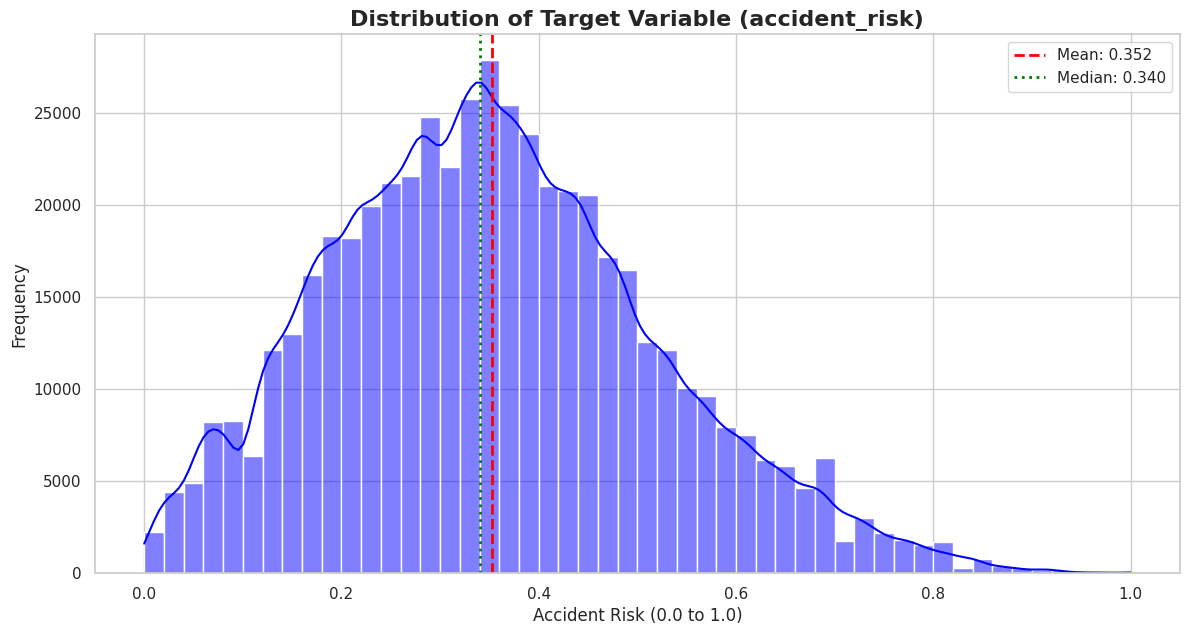

In [44]:
print("--- Target Variable (accident_risk) Statistics ---")
print(df['accident_risk'].describe())
print("\n")

plt.figure(figsize=(14, 7))
sns.histplot(df['accident_risk'], kde=True, bins=50, color='blue')
plt.title('Distribution of Target Variable (accident_risk)', fontsize=16, weight='bold')
plt.xlabel('Accident Risk (0.0 to 1.0)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.axvline(df['accident_risk'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["accident_risk"].mean():.3f}')
plt.axvline(df['accident_risk'].median(), color='green', linestyle=':', linewidth=2, label=f'Median: {df["accident_risk"].median():.3f}')
plt.legend()
plt.show()

## **Univariate Feature Analysis**

Now we will analyze each feature one by one to understand its internal distribution.

In [45]:
categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
                        'public_road', 'time_of_day', 'holiday', 'school_season']

numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

print(f"Categorical features identified: {len(categorical_features)}")
print(f"Numerical features identified: {len(numerical_features)}")

Categorical features identified: 8
Numerical features identified: 4


### **Categorical Feature Distribution (Tables)**



In [46]:
for col in categorical_features:

    display(HTML(f'<h3>Feature: {col}</h3>'))


    count_table = df[col].value_counts()
    percentage_table = df[col].value_counts(normalize=True) * 100
    combined_table = pd.DataFrame({'Count': count_table, 'Percentage (%)': percentage_table.round(2)})


    display(combined_table)
    print("\n")

,Count,Percentage (%)
road_type,,
highway,173672,33.54
rural,172719,33.36
urban,171363,33.10


,Count,Percentage (%)
lighting,,
dim,183826,35.50
daylight,178015,34.38
night,155913,30.11


,Count,Percentage (%)
weather,,
foggy,181463,35.05
clear,179306,34.63
rainy,156985,30.32


,Count,Percentage (%)
road_signs_present,,
False,259289,50.08
True,258465,49.92


,Count,Percentage (%)
public_road,,
True,260045,50.23
False,257709,49.77


,Count,Percentage (%)
time_of_day,,
morning,173410,33.49
evening,172837,33.38
afternoon,171507,33.13


,Count,Percentage (%)
holiday,,
True,260688,50.35
False,257066,49.65


,Count,Percentage (%)
school_season,,
False,260164,50.25
True,257590,49.75


###  **Categorical Feature Distribution (Bar Plots)**

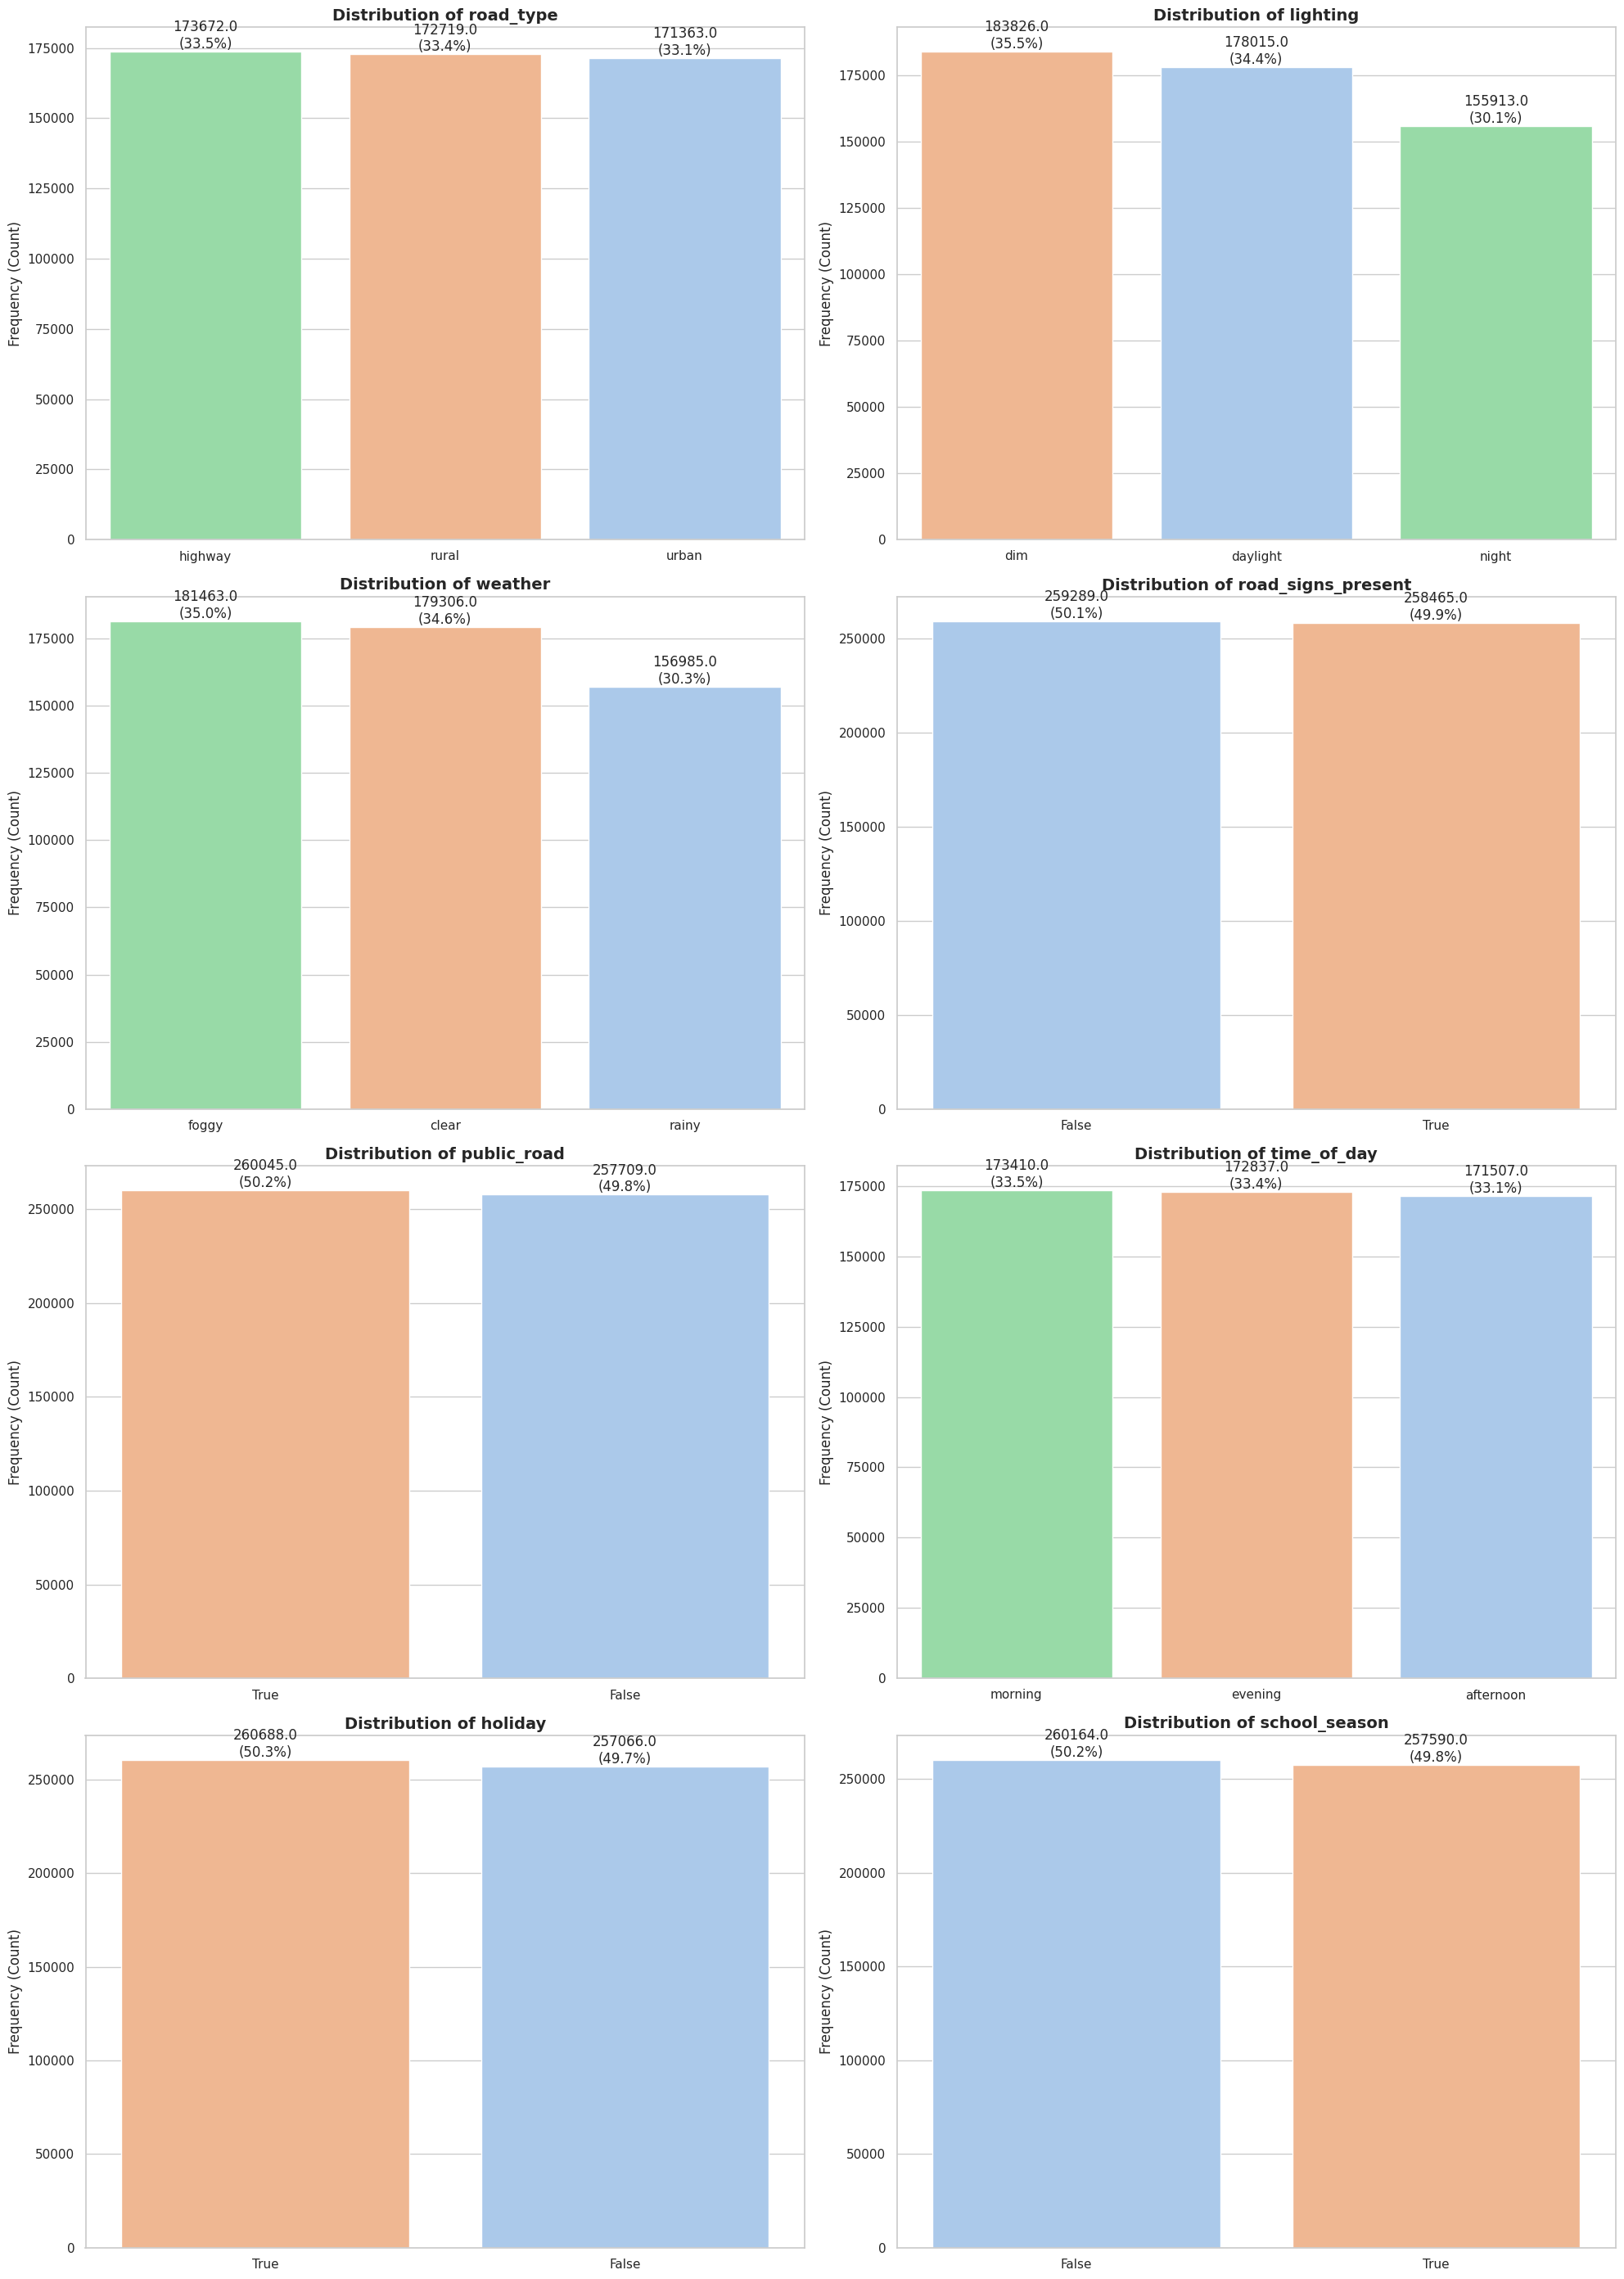

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(20, 28))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(
        x=df[col],
        ax=axes[i],
        palette='pastel',
        order=df[col].value_counts().index,


        hue=df[col],
        legend=False
    )

    axes[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    axes[i].set_ylabel('Frequency (Count)', fontsize=12)
    axes[i].set_xlabel('')

    total = len(df[col])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2.,
                     height + 3,
                     f'{height}\n({height/total*100:.1f}%)',
                     ha="center", va="bottom")

plt.tight_layout()
plt.show()

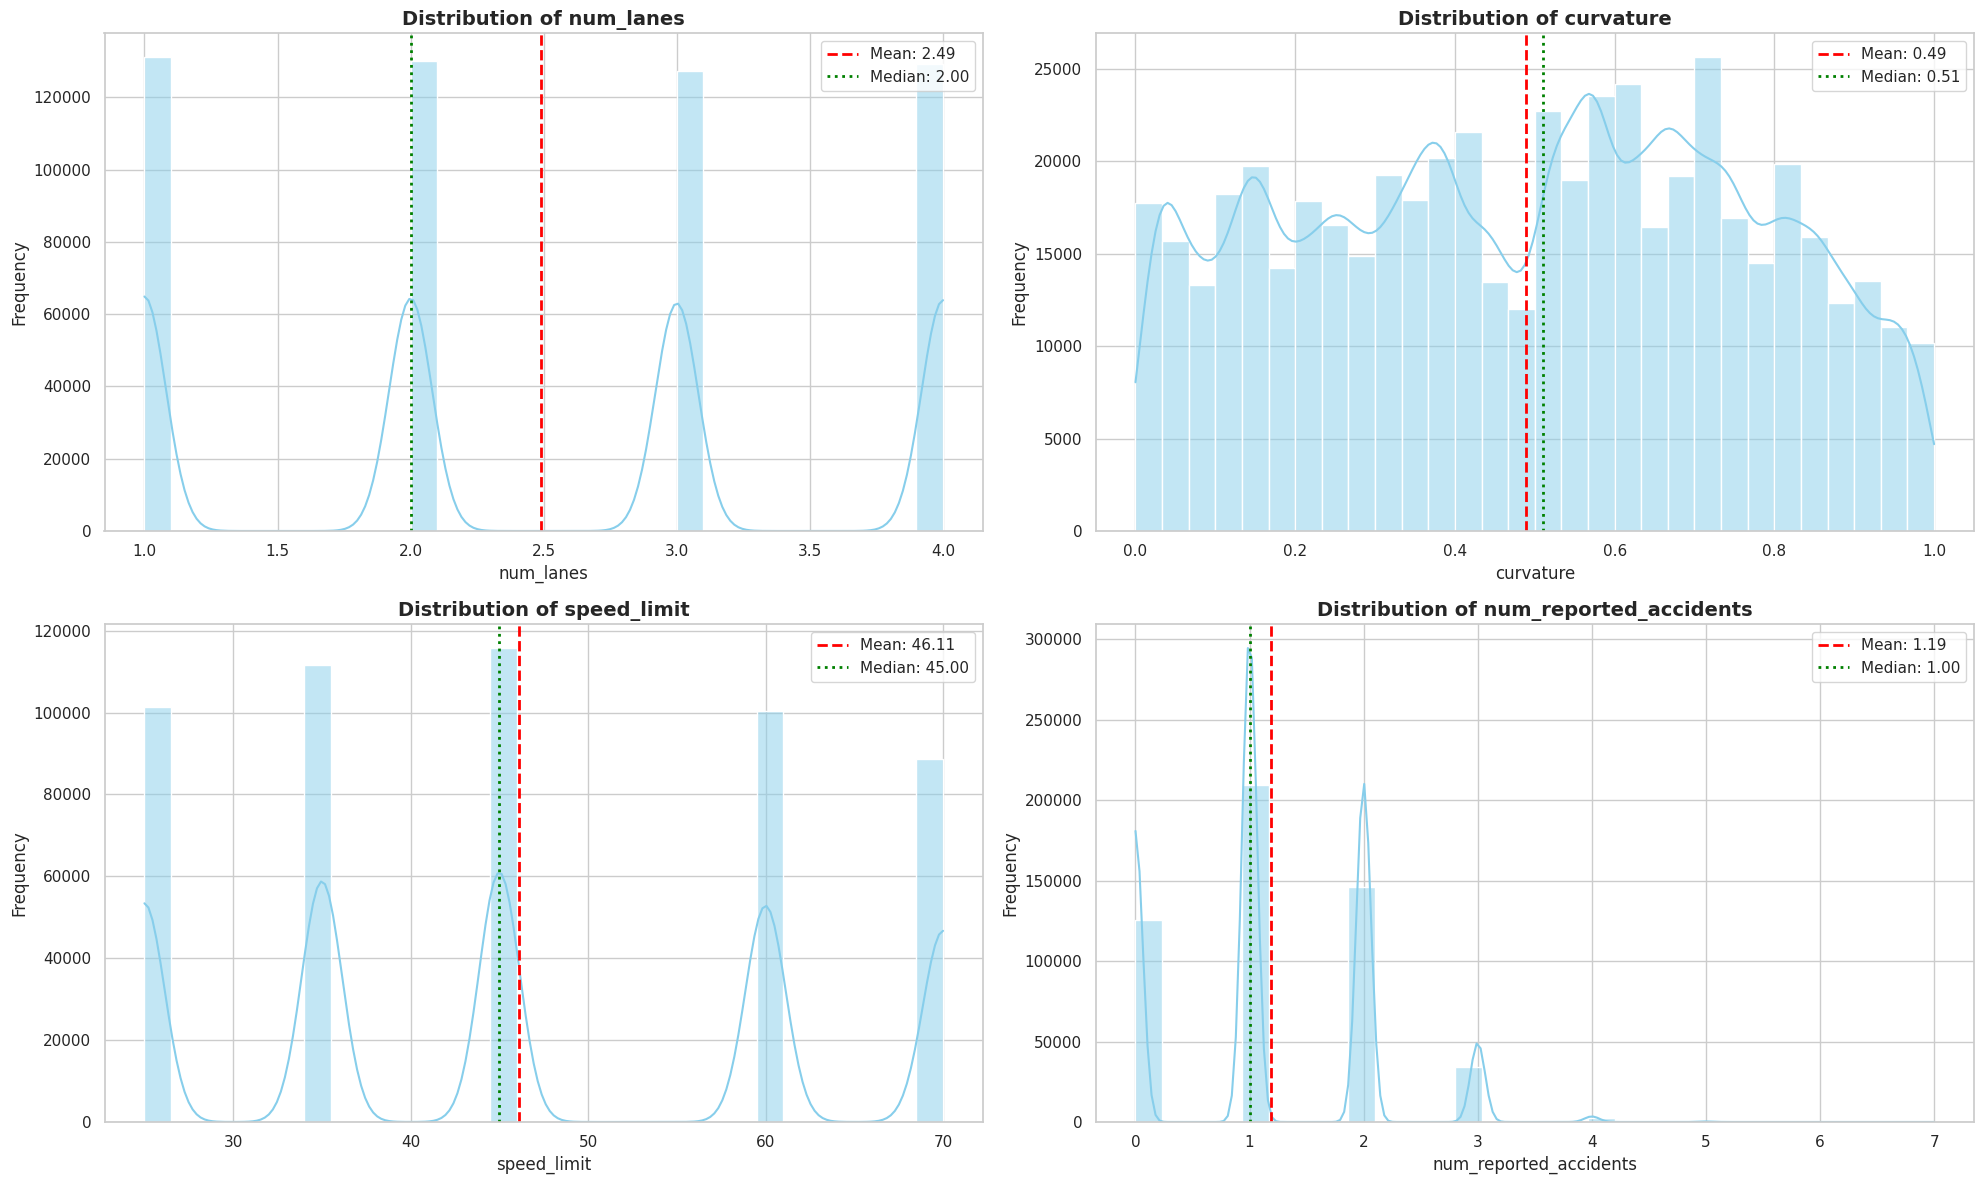

In [50]:
# Our numerical features
numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(
        df[col],
        kde=True,
        ax=axes[i],
        color='skyblue',
        bins=30
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Mean and Median
    mean_val = df[col].mean()
    median_val = df[col].median()
    # Red dashed line = Mean
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    # Green dotted line = Median
    axes[i].axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[numerical_features])


df_scaled = pd.DataFrame(scaled_features, columns=numerical_features)
df_scaled.head()

,num_lanes,curvature,speed_limit,num_reported_accidents
0,-0.438680,-1.572918,-0.703840,-0.209797
1,1.346344,1.839137,-0.703840,-1.325918
2,1.346344,0.518342,1.512963,0.906324
3,1.346344,-1.536229,-0.703840,-0.209797
4,-1.331192,0.334898,0.879591,-0.209797


** Comparative Boxplot of Scaled Features **


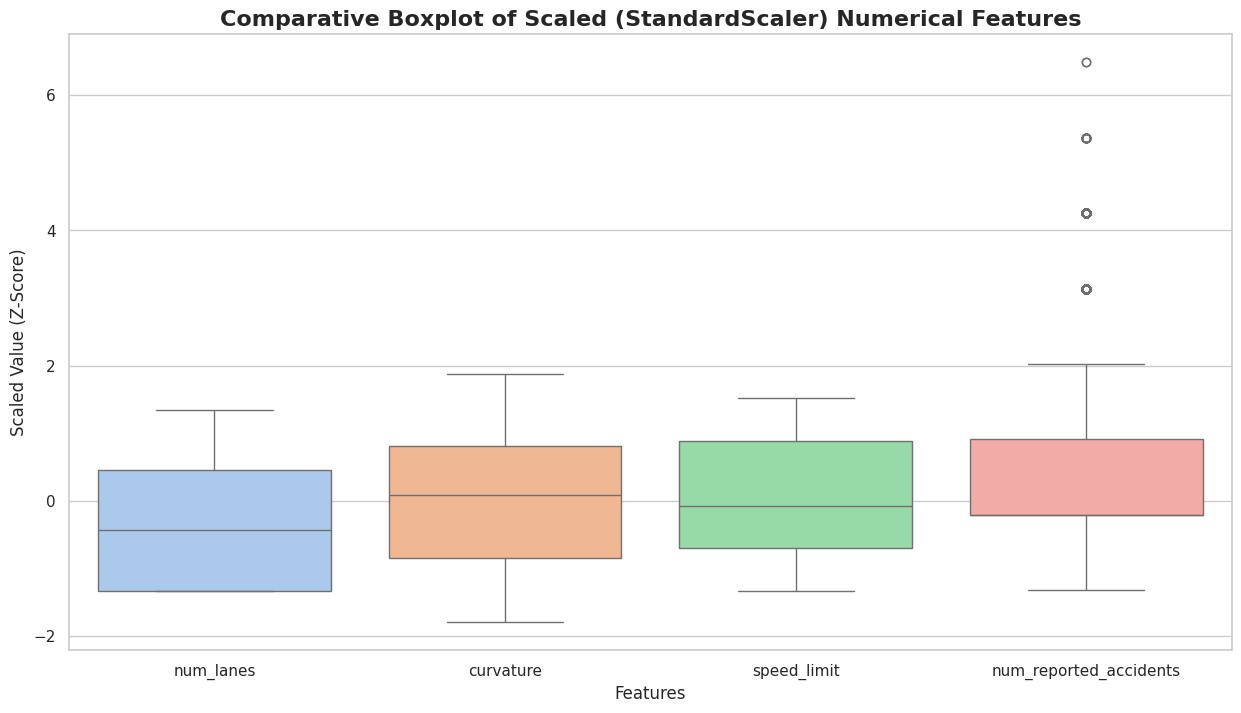

In [52]:
print("** Comparative Boxplot of Scaled Features **")

plt.figure(figsize=(15, 8))
sns.boxplot(
    data=df_scaled,
    palette='pastel'
)
plt.title('Comparative Boxplot of Scaled (StandardScaler) Numerical Features', weight='bold', fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scaled Value (Z-Score)", fontsize=12)
plt.show()

*** Numerical Features vs. Target Variable (Density Plots) ***


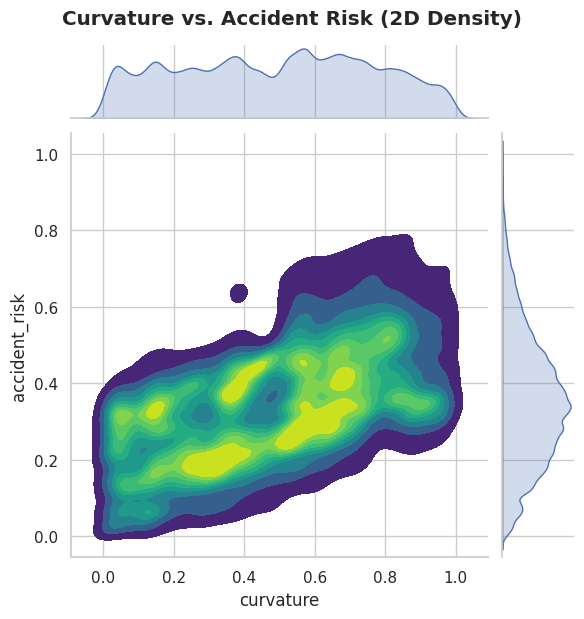

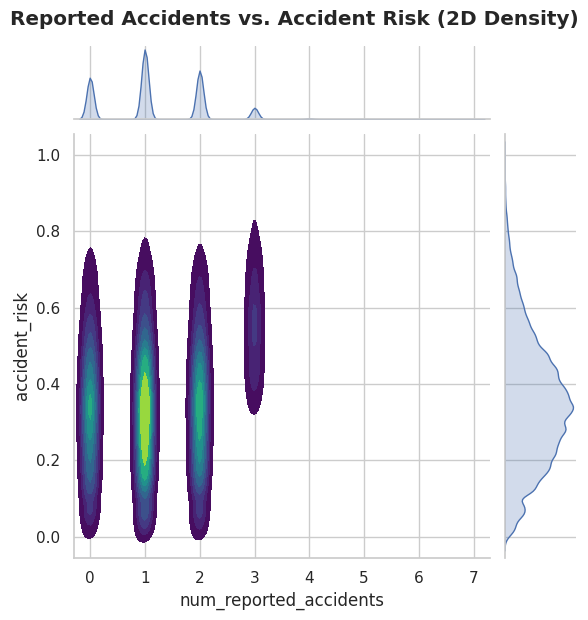

In [53]:
print("*** Numerical Features vs. Target Variable (Density Plots) ***")

sns.jointplot(
    data=df,
    x='curvature',
    y='accident_risk',
    kind='kde',
    fill=True,
    cmap='viridis'
)
plt.suptitle('Curvature vs. Accident Risk (2D Density)', y=1.03, weight='bold')
plt.show()



sns.jointplot(
    data=df,
    x='num_reported_accidents',
    y='accident_risk',
    kind='kde',
    fill=True,
    cmap='viridis'
)
plt.suptitle('Reported Accidents vs. Accident Risk (2D Density)', y=1.03, weight='bold')
plt.show()

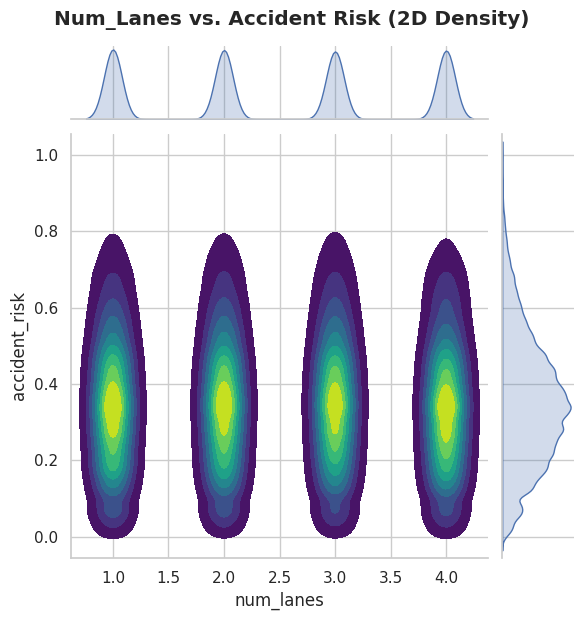

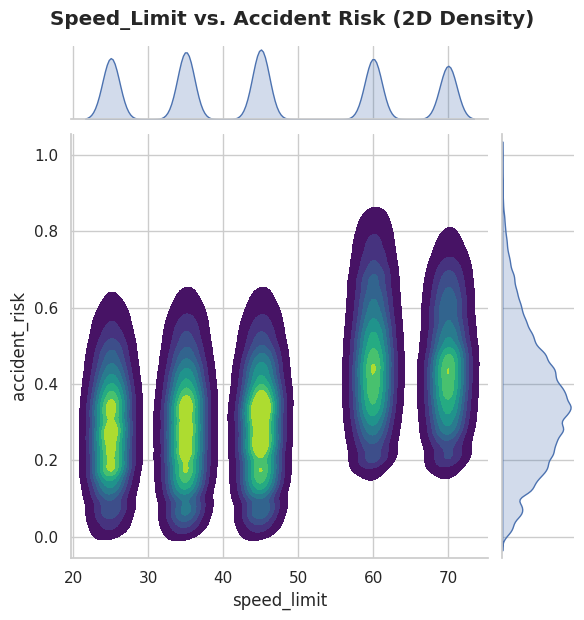

In [55]:
sns.jointplot(
    data=df,
    x='num_lanes',
    y='accident_risk',
    kind='kde',
    fill=True,
    cmap='viridis'
)
plt.suptitle('Num_Lanes vs. Accident Risk (2D Density)', y=1.03, weight='bold')
plt.show()

sns.jointplot(
    data=df,
    x='speed_limit',
    y='accident_risk',
    kind='kde',
    fill=True,
    cmap='viridis'
)
plt.suptitle('Speed_Limit vs. Accident Risk (2D Density)', y=1.03, weight='bold')
plt.show()

In [56]:
# categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
#                        'public_road', 'time_of_day', 'holiday', 'school_season']

for col in categorical_features:
    df[col] = df[col].astype(str)

print(df[categorical_features].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   road_type           517754 non-null  object
 1   lighting            517754 non-null  object
 2   weather             517754 non-null  object
 3   road_signs_present  517754 non-null  object
 4   public_road         517754 non-null  object
 5   time_of_day         517754 non-null  object
 6   holiday             517754 non-null  object
 7   school_season       517754 non-null  object
dtypes: object(8)
memory usage: 31.6+ MB
None


** Categorical Features vs. Target Variable **


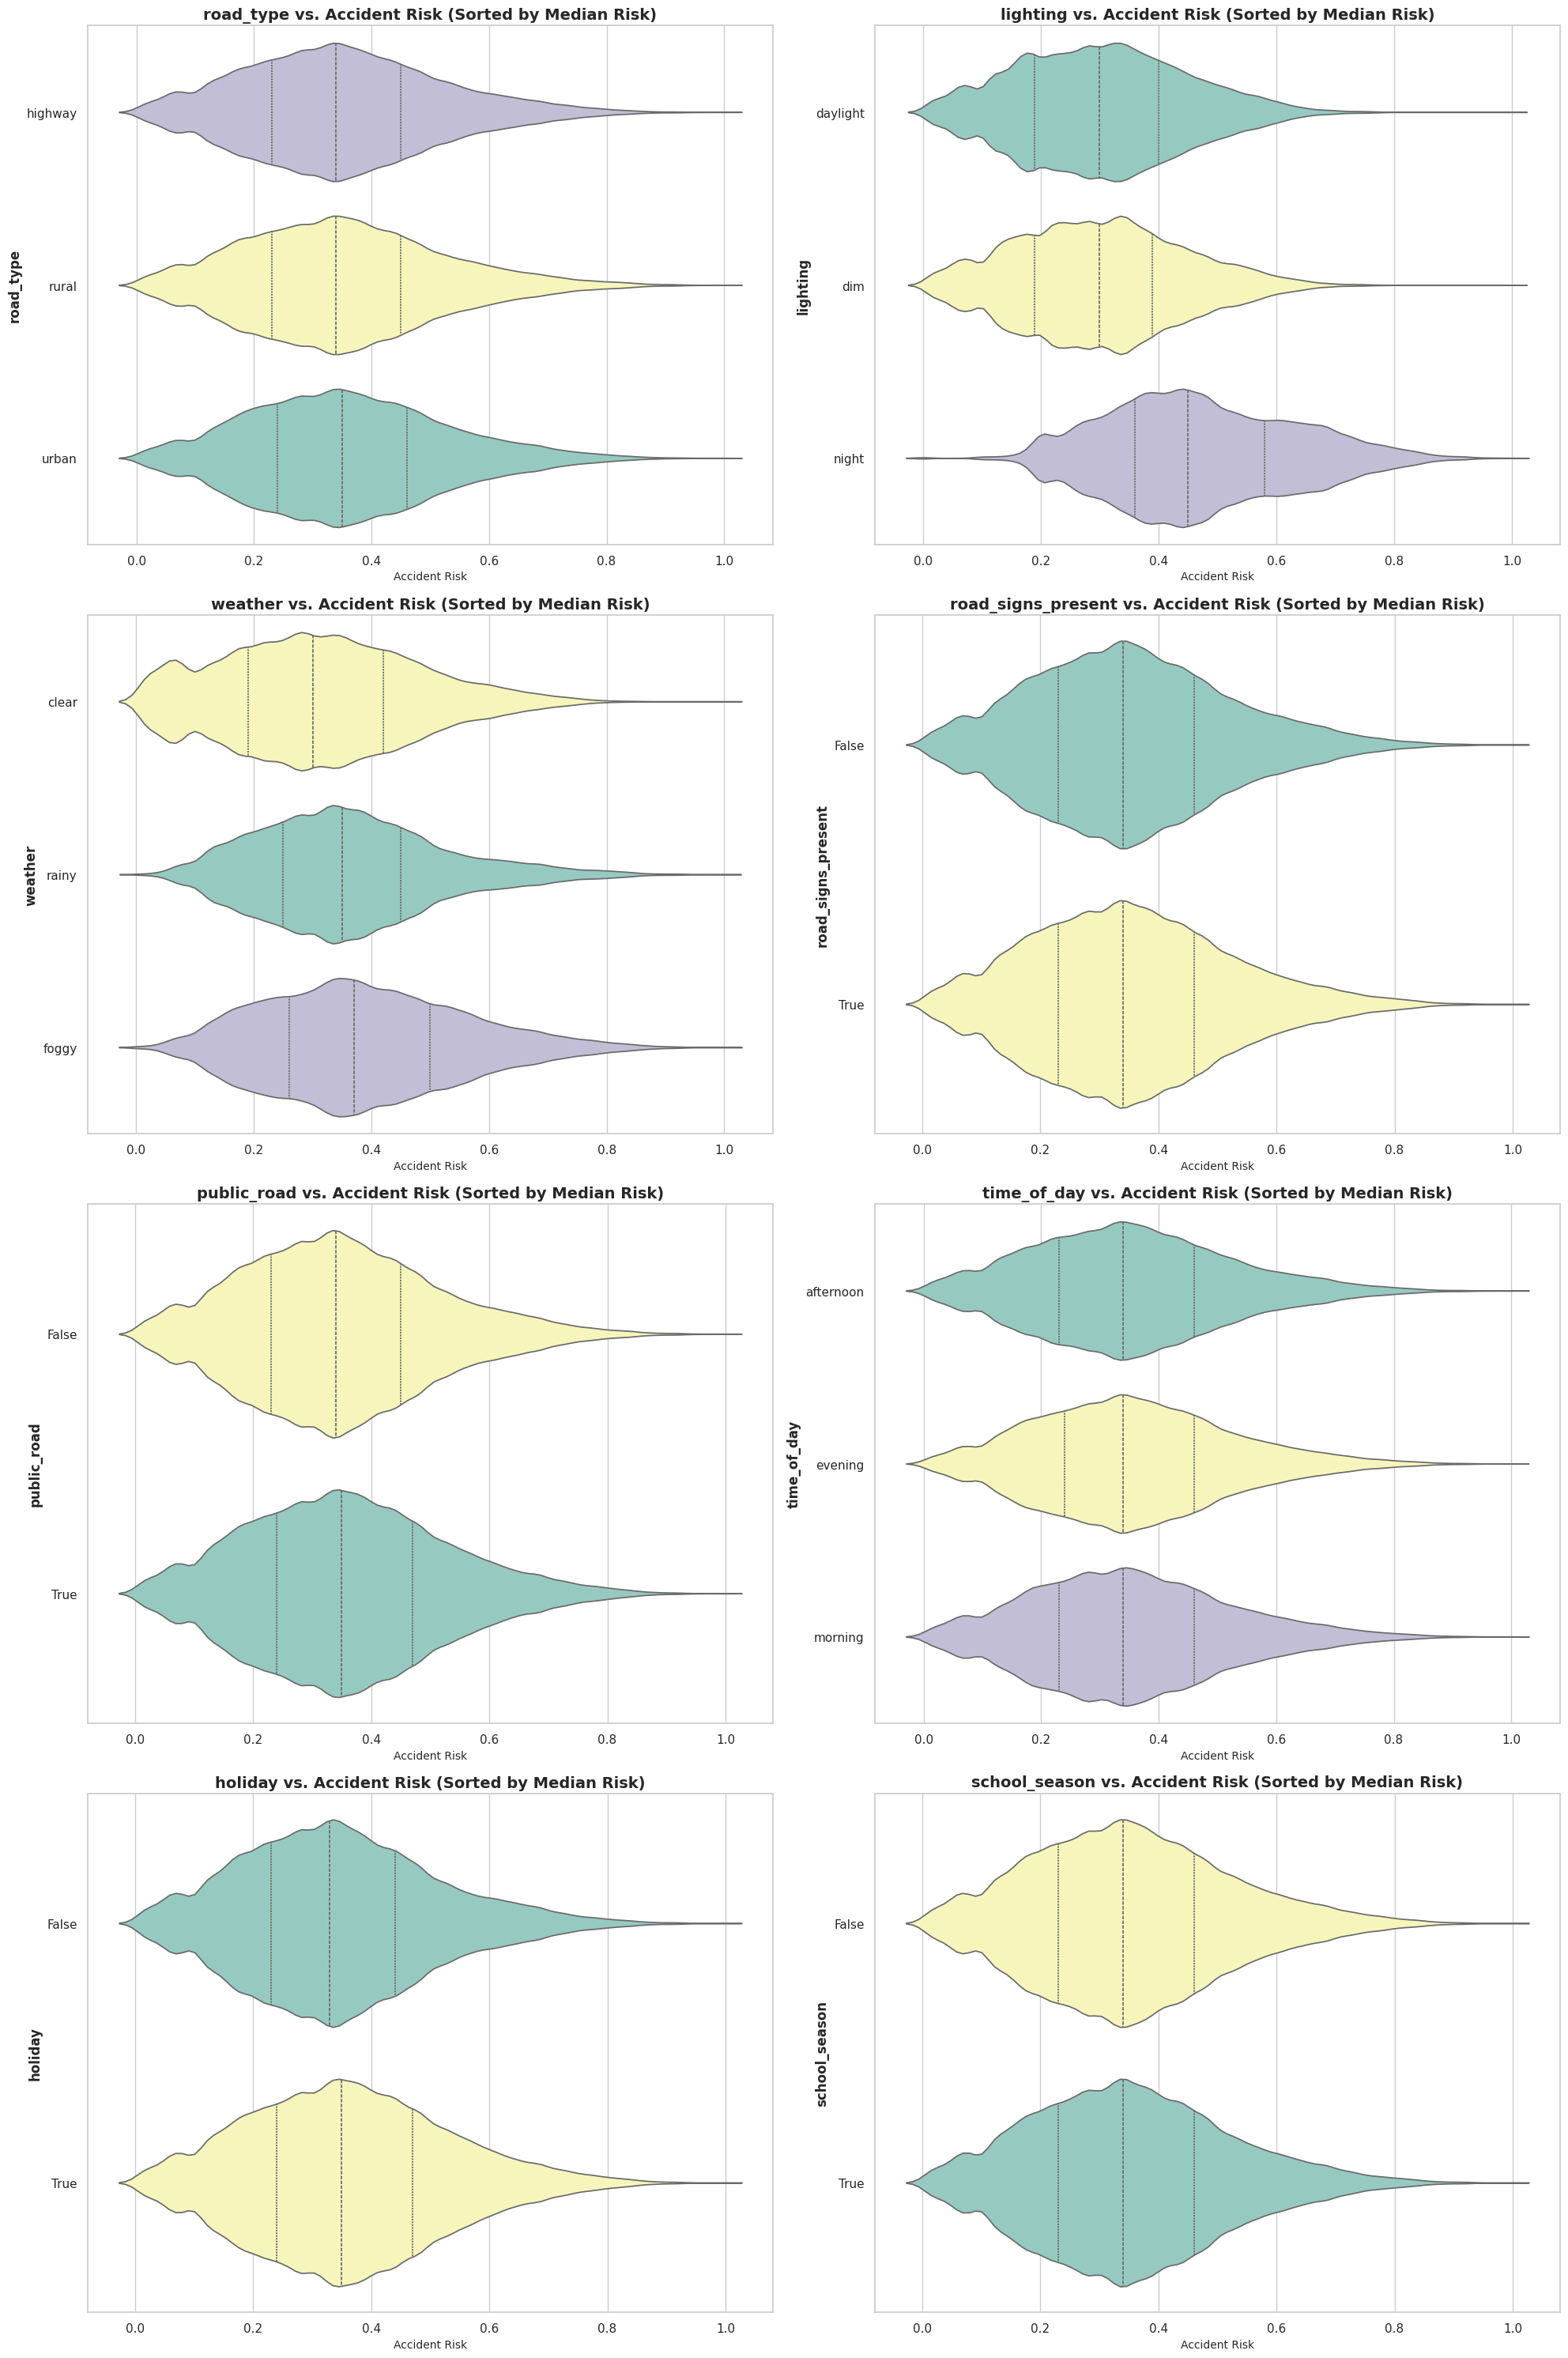

In [57]:
print("** Categorical Features vs. Target Variable **")

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_features):

    order = df.groupby(col)['accident_risk'].median().sort_values().index


    sns.violinplot(
        data=df,
        x='accident_risk',
        y=col,
        ax=axes[i],
        order=order,
        palette='Set3',
        inner='quartile',


        hue=col,
        legend=False

    )

    axes[i].set_title(f'{col} vs. Accident Risk (Sorted by Median Risk)', fontsize=14, weight='bold')
    axes[i].set_xlabel('Accident Risk', fontsize=10)
    axes[i].set_ylabel(col, fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

** Correlation Matrix of Numerical Features **
Correlation matrix is being calculated for these columns: ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']


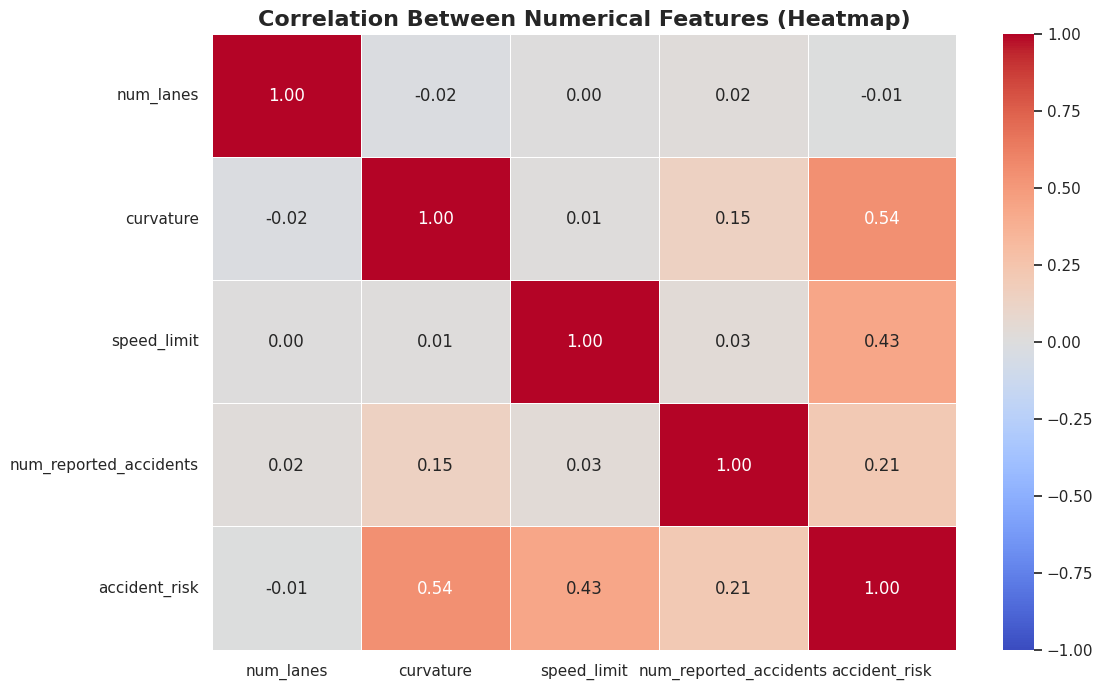

In [58]:
print("** Correlation Matrix of Numerical Features **")

correlation_cols = numerical_features + ['accident_risk']

print(f"Correlation matrix is being calculated for these columns: {correlation_cols}")
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title('Correlation Between Numerical Features (Heatmap)', fontsize=16, weight='bold')
plt.show()

** Interaction Analysis (lighting x road_type) **


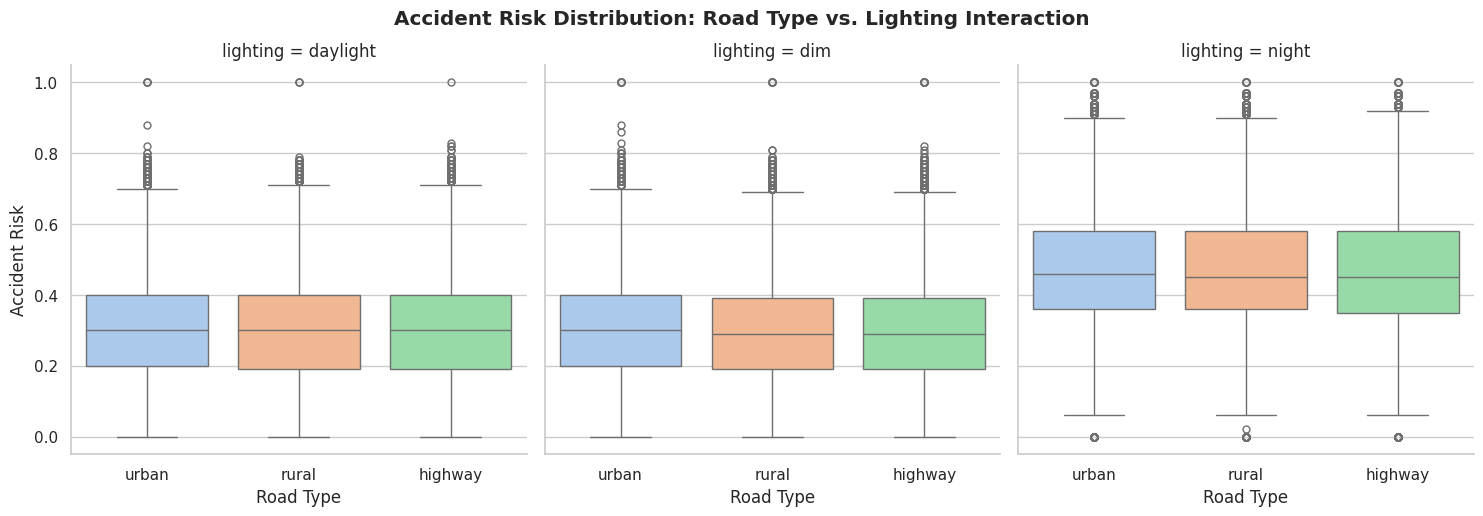

In [59]:
print("** Interaction Analysis (lighting x road_type) **")

g = sns.catplot(
    data=df,
    x='road_type',
    y='accident_risk',
    col='lighting',
    kind='box',
    palette='pastel',


    hue='road_type',
    legend=False

)

g.fig.suptitle('Accident Risk Distribution: Road Type vs. Lighting Interaction', y=1.03, weight='bold')
g.set_axis_labels("Road Type", "Accident Risk")
plt.show()

** Interaction Analysis (using Hue) **


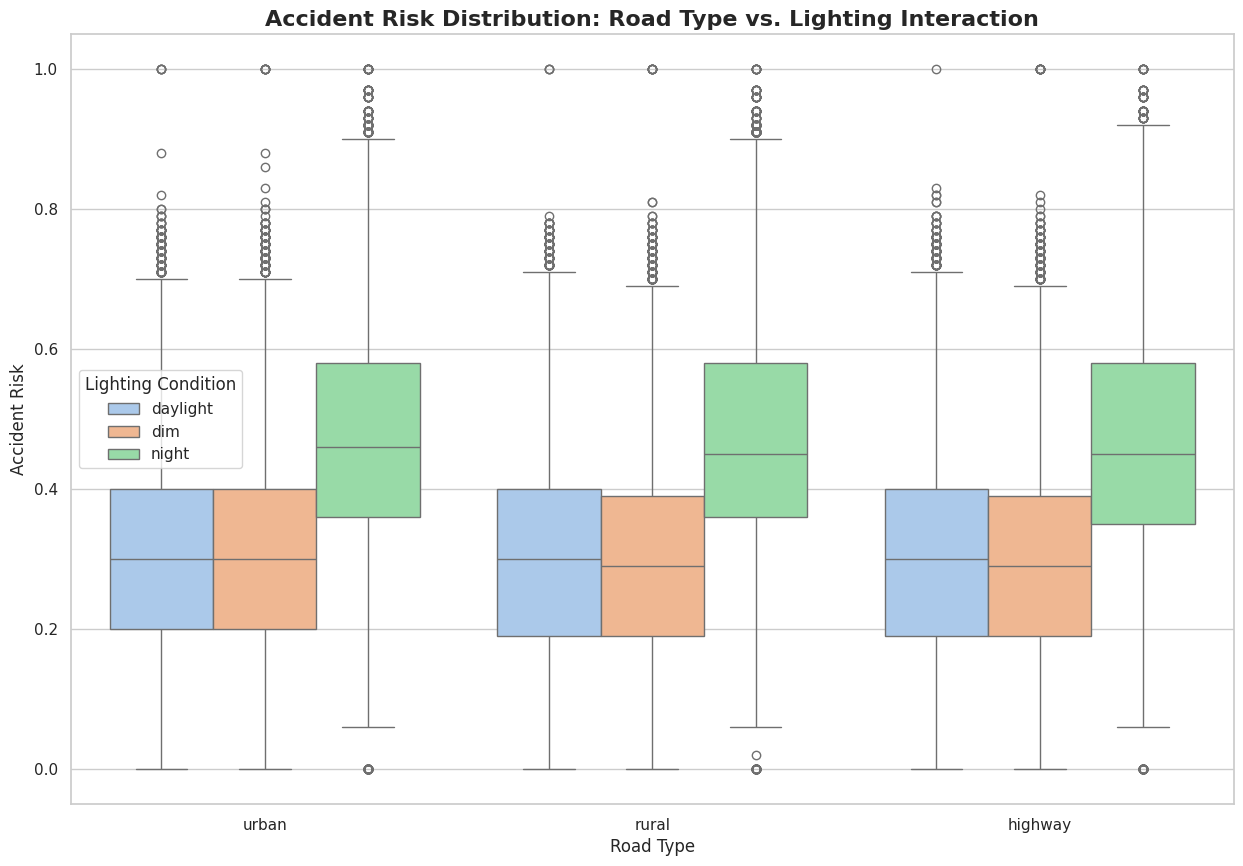

In [60]:
print("** Interaction Analysis (using Hue) **")

plt.figure(figsize=(15, 10))
sns.boxplot(
    data=df,
    x='road_type',
    y='accident_risk',
    hue='lighting',
    palette='pastel'
)
plt.title('Accident Risk Distribution: Road Type vs. Lighting Interaction', weight='bold', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Accident Risk', fontsize=12)
plt.legend(title='Lighting Condition')
plt.show()

** Numerical-Categorical Interaction Analysis **


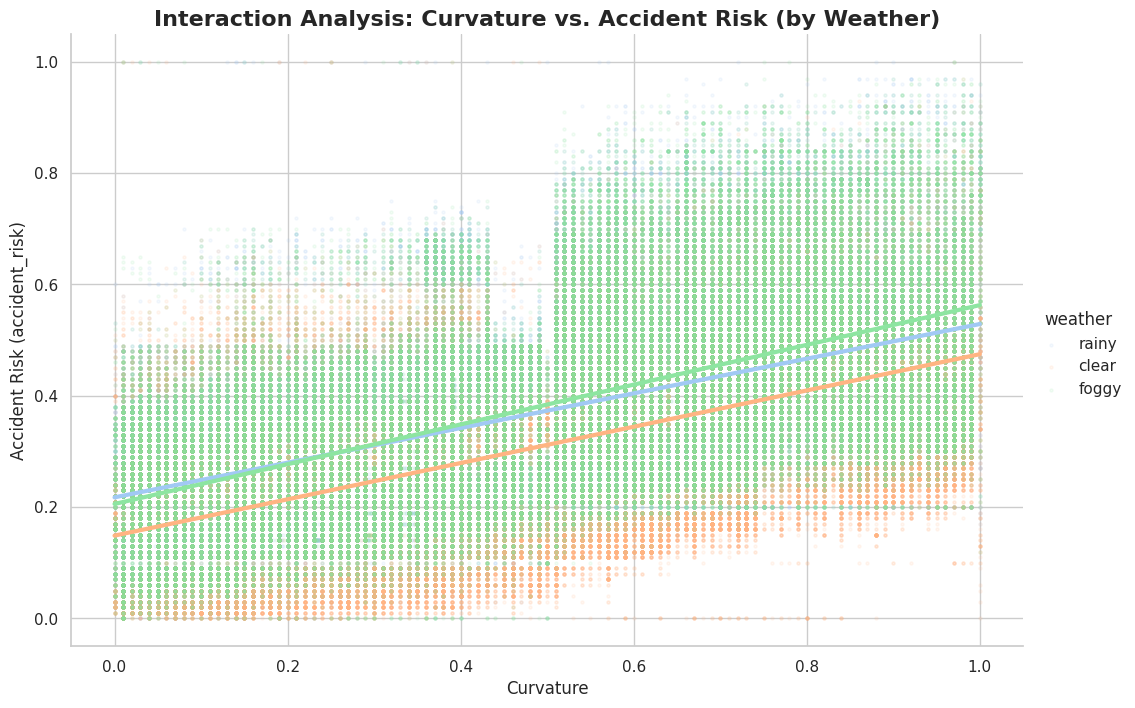

In [61]:
print("** Numerical-Categorical Interaction Analysis **")

sns.lmplot(
    data=df,
    x='curvature',
    y='accident_risk',
    hue='weather',
    palette='pastel',
    height=7,
    aspect=1.5,
    scatter_kws={'s': 5, 'alpha': 0.1},
    line_kws={'lw': 3}
)

plt.title('Interaction Analysis: Curvature vs. Accident Risk (by Weather)', fontsize=16, weight='bold')
plt.xlabel('Curvature', fontsize=12)
plt.ylabel('Accident Risk (accident_risk)', fontsize=12)
plt.show()

In [62]:
print("** Taking a sample for faster plotting **")

# Selecting 50,000 random rows from the dataset
df_sample = df.sample(n=50000, random_state=42)

print(f"New sample dimensions: {df_sample.shape}")

** Taking a sample for faster plotting **
New sample dimensions: (50000, 14)


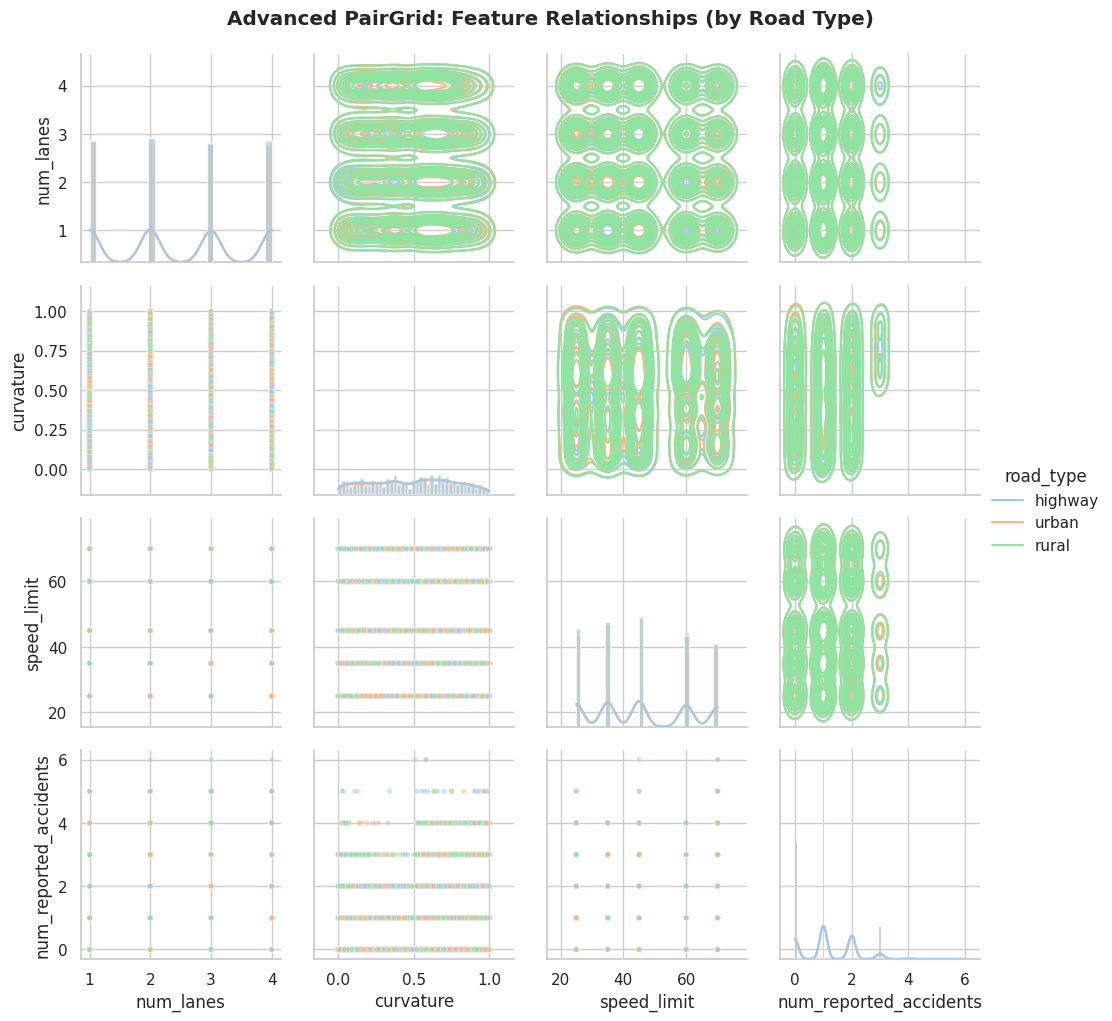

In [63]:
# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
# Create the PairGrid.
# Separate colors by 'road_type' (highway, urban, rural) using hue.
g = sns.PairGrid(
    df_sample,
    vars=numerical_features,
    hue='road_type',
    palette='pastel'
)
g.map_lower(sns.scatterplot, s=15, alpha=0.5)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.kdeplot)
g.add_legend()

plt.suptitle('Advanced PairGrid: Feature Relationships (by Road Type)', y=1.02, weight='bold')
plt.show()

In [64]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)


    if min((kcorr-1), (rcorr-1)) == 0:
        return np.nan
    else:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



In [65]:
print("Categorical features list...")
# categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
#                        'public_road', 'time_of_day', 'holiday', 'school_season']

cramers_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                                index=categorical_features,
                                columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Categorical correlation matrix has been calculated.")
print(cramers_matrix.round(2))

Categorical features list...
Categorical correlation matrix has been calculated.
                    road_type  lighting  weather  road_signs_present  \
road_type                1.00      0.01     0.01                0.00   
lighting                 0.01      1.00     0.05                0.01   
weather                  0.01      0.05     1.00                0.01   
road_signs_present       0.00      0.01     0.01                1.00   
public_road              0.00      0.00     0.01                0.00   
time_of_day              0.00      0.01     0.02                0.01   
holiday                  0.00      0.02     0.02                0.00   
school_season            0.00      0.00     0.00                0.00   

                    public_road  time_of_day  holiday  school_season  
road_type                  0.00         0.00     0.00           0.00  
lighting                   0.00         0.01     0.02           0.00  
weather                    0.01         0.02     0.02    

** Correlation Between Categorical Features (Cramér's V Heatmap) **


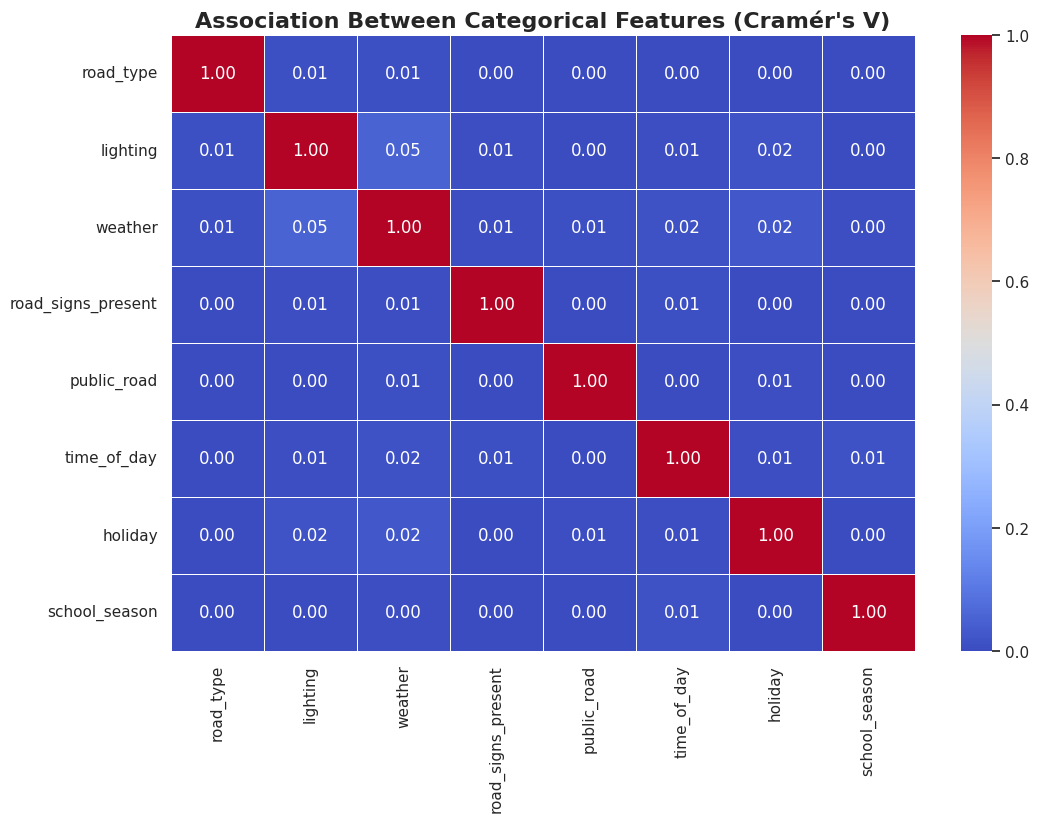

In [66]:
print("** Correlation Between Categorical Features (Cramér's V Heatmap) **")

plt.figure(figsize=(12, 8))
sns.heatmap(
    cramers_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=0, vmax=1
)
plt.title('Association Between Categorical Features (Cramér\'s V)', fontsize=16, weight='bold')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

print("** Preparing Data for Quick Modeling **")
# categorical_features = ['road_type', 'lighting', 'weather', ...]
# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

X = df_sample[categorical_features + numerical_features]
y = df_sample['accident_risk']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

print(f"Data processed. New feature matrix shape: {X_processed.shape}")

** Preparing Data for Quick Modeling **
Data processed. New feature matrix shape: (50000, 24)


In [68]:
from sklearn.ensemble import RandomForestRegressor

print("** Training Random Forest Model **")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_samples=0.5)
rf_model.fit(X_processed, y)

print("Model trained!")

** Training Random Forest Model **
Model trained!


** Plotting Partial Dependence Plots **


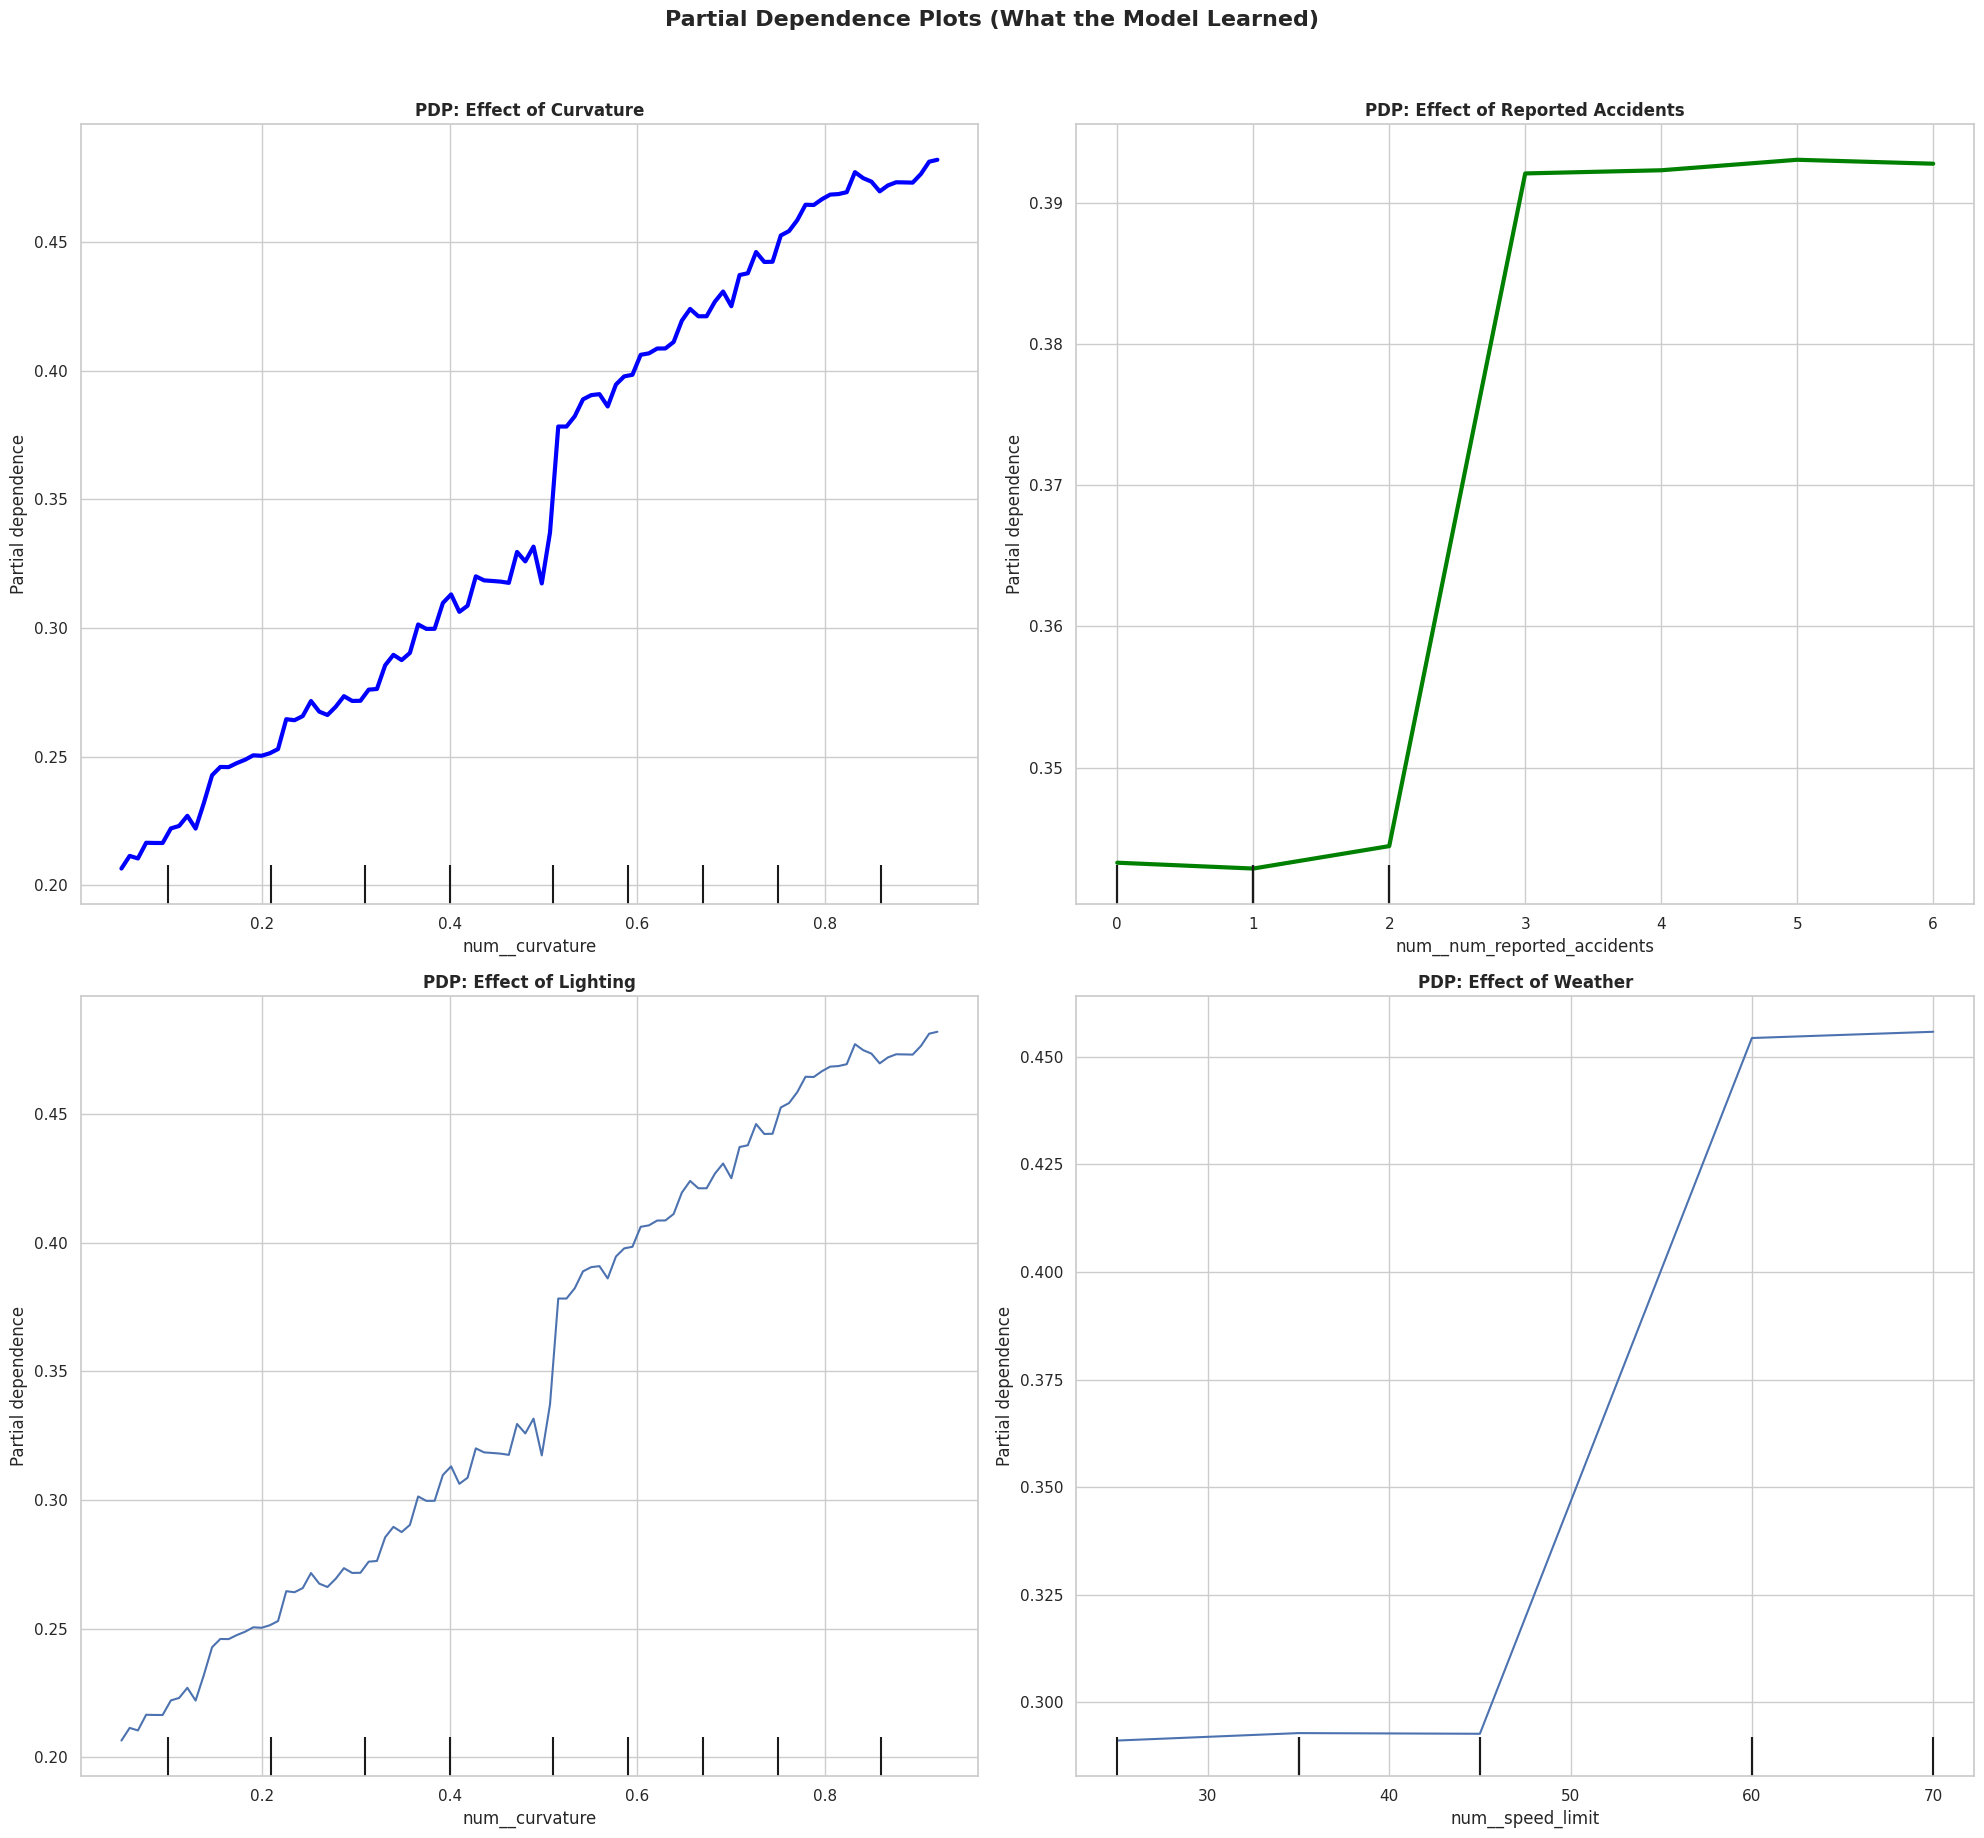

In [69]:
from sklearn.inspection import PartialDependenceDisplay

print("** Plotting Partial Dependence Plots **")

# Top 2 numerical (curvature, num_reported_accidents)
# Top 2 categorical (lighting, weather)
pdp_features_to_plot = ['curvature', 'num_reported_accidents', 'lighting', 'weather']
feature_names = preprocessor.get_feature_names_out()

fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# 'curvature'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[numerical_features.index('curvature')],
    feature_names=feature_names,
    ax=axes[0, 0],
    line_kw={'color': 'blue', 'lw': 3}
)
axes[0, 0].set_title('PDP: Effect of Curvature', weight='bold')

# 'num_reported_accidents'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[numerical_features.index('num_reported_accidents')],
    feature_names=feature_names,
    ax=axes[0, 1],
    line_kw={'color': 'green', 'lw': 3}
)
axes[0, 1].set_title('PDP: Effect of Reported Accidents', weight='bold')



# 'lighting'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[categorical_features.index('lighting')],
    feature_names=feature_names,
    ax=axes[1, 0]
)
axes[1, 0].set_title('PDP: Effect of Lighting', weight='bold')

# 'weather'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[categorical_features.index('weather')],
    feature_names=feature_names,
    ax=axes[1, 1]
)
axes[1, 1].set_title('PDP: Effect of Weather', weight='bold')


plt.suptitle("Partial Dependence Plots (What the Model Learned)", y=1.02, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()